In [134]:
from datetime import datetime 
from concurrent import futures 
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline

end = datetime.now() 
start = datetime(end.year - 5, end.month , end.day)
bad = []

def download(ticker):
    try:
        df = web.DataReader(ticker,'iex', start, end)
        df.to_csv(f"spy/{ticker}.csv")
    except Exception as e:
        bad.append(ticker)
        print(f"{ticker}: {e}")

    

In [38]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table = data[0]
tickers = table[1:][0].tolist()
tickers[:5]

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN']

In [29]:
bad = []
with futures.ThreadPoolExecutor(50) as executor: 
    res = executor.map(download, tickers) 

In [30]:
bad

[]

In [39]:
pd.Series(tickers).to_csv("spy/tickers.csv")

In [140]:
tickers = pd.read_csv('spy/tickers.csv', header=None)[1].tolist()

In [141]:
import backtrader as bt

cerebro = bt.Cerebro()



In [214]:

class BuyOnGap(bt.Strategy):
    def __init__(self):
        self.sma20 = {}
        self.stddev = {}
        self.lcontrol = 0
        for d in self.datas:
            self.sma20[d] = bt.indicators.SimpleMovingAverage(d.close, 
                                                              period=20)
            self.stddev[d] = bt.indicators.StdDev(d.close, period=90)
            
    def prenext(self):
        if len(self.data) > self.lcontrol: # market open tick
            buys = []
            for d in self.datas:
                if len(d) > 180:
                    if d.open[0] - d.low[-1]  > self.stddev[d][0]: # gapped up
                        #if d.open[0] > self.sma20[d][0]: # higher than 20 day MA
                        buys.append(d)        
            for d in buys:
                self.order_target_percent(data=d, target=1/len(buys))
                
        else: # market close tick
            for d in self.datas:
                if self.getposition(d).size:
                    self.close(data=d)
                        
                                
        self.lcontrol = len(self.data)

        

In [215]:

cerebro = bt.Cerebro()

for ticker in tickers:
    data = bt.feeds.GenericCSVData(
        fromdate=start,
        todate=end,
        dataname=f"spy/{ticker}.csv",
        dtformat=('%Y-%m-%d'),
        openinterest=-1,
        nullvalue=0.0,
        plot=False
    )
    data.addfilter(bt.filters.BarReplayer_Open)
    cerebro.adddata(data)

cerebro.addstrategy(BuyOnGap)
cerebro.run()

<IPython.core.display.Javascript object>


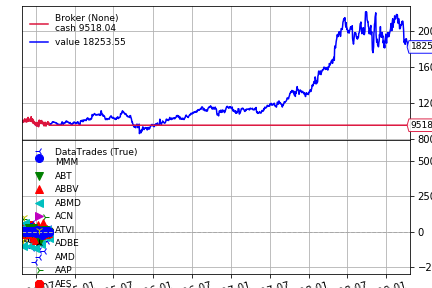

[[<Figure size 432x288 with 32 Axes>]]

In [211]:
cerebro.plot()

In [182]:
cerebro

In [146]:
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS